# Guided Project: Visualizing Earnings Based On College Majors

## Introduction

In this project I'll explore padas plotting functionality by investigating a dataset on job outcomes of college graduates who were under 28 years old when the data was collected between 2010 and 2012.

The original data was released by the US Census's [American Community Survey](https://www.census.gov/programs-surveys/acs/). I'll be using a cleaned dataset prepared by FiveThirtyEight and released on their [Github repository](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different college major and contains information on gender diversity, employment rates, median salaries, and more. 

Select columns in the dataset include:

 * `Rank` - Rank by median earnings (the dataset is ordered by this column).
 * `Major_code` - Major code.
 * `Major` - Major description.
 * `Major_category` - Category of major.
 * `Total` - Total number of people with major.
 * `Sample_size` - Sample size (unweighted) of full-time, year-round ONLY (used for earnings).
 * `Men` - Total number of Male graduates.
 * `Women` - Total number of Female graduates.
 * `ShareWomen` - Women as share of total.
 * `Employed` - Number employed.
 * `Median` - Median salary of full-time, year-round workers.
 * `Low_wage_jobs` - Number in low-wage service jobs.
 * `Full_time` - Number employed 35 hours or more.
 * `Part_time` - Number employed less than 35 hours.
 

## Goal

I will gain experience by using various Pandas/Matplotlib chart types to investigate the following questions:

 * Do students in more popular majors make more money?
 * How many majors are predominantly male? Predominantly female?
 * What category of majors have the most students?

## Summary

* The highest earning majors are among the least popular.
* The most popular majors have earnings at or below the mean for all majors.
* \~4% of majors are predominantly (>75%) male, while \~22% are predominantly female.
* Of the ten top-ranked majors:
  * Seven are predominantly male.
  * None of the remaining three are more than 50% female.
* Of the ten bottom-ranked majors:
  * All have a majority of female graduates. 
  * Two have nearly 100% female graduates.
  * None and none have fewer than 60% female graudates.
* *Business* and *Humanities & Liberal Arts* are the most popular categories of majors.

# Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads.iloc[1]

Rank                                                 2
Major_code                                        2416
Major                   MINING AND MINERAL ENGINEERING
Total                                              756
Men                                                679
Women                                               77
Major_category                             Engineering
ShareWomen                                    0.101852
Sample_size                                          7
Employed                                           640
Full_time                                          556
Part_time                                          170
Full_time_year_round                               388
Unemployed                                          85
Unemployment_rate                             0.117241
Median                                           75000
P25th                                            55000
P75th                                            90000
College_jo

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe(include="all")

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,MULTI-DISCIPLINARY OR GENERAL SCIENCE,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


Based on value counts, it appears the in the `Total`, `Men` and `Women` columns each have a row with missing values.

In [6]:
recent_grads[recent_grads["Total"].isnull()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


It appears that the missing values are all confined to one row, for the `FOOD SCIENCE` major. I will drop this row because missing values can cause matplotlib to throw errors.

In [7]:
raw_data_count = len(recent_grads)
raw_data_count

173

In [8]:
recent_grads = recent_grads.dropna()

In [9]:
cleaned_data_count = len(recent_grads)
cleaned_data_count

172

As expected, this operation removed a single row.

# Analysis

## Visualizing Relationships with Scatter Plots

(0.0, 323329.65)

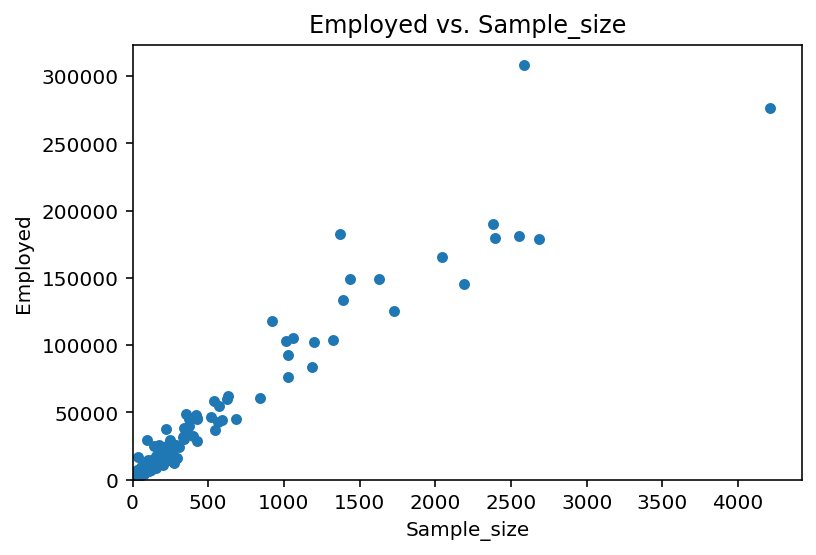

In [10]:
ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
ax.set_title("Employed vs. Sample_size")
ax.set_xlim(0)
ax.set_ylim(0)

The above chart compares the total number of people employed with each major to the Sample size of of full-time, year-round employees.

There is a clear relationship between the total number employed and sample sizes. This is not surprising, nor is it suprising that this isn't a perfect linear relationship. It does seem notable that the ratio for some majors diverges so much. 

Those sampled for their annual salaries are, logically, a subset of those employed. Therefore, it makes sense to view `Sample_size` as a dependent variable of `Employed.` Let's transpose the axees to better visualize this relationship.

(0.0, 4422.5)

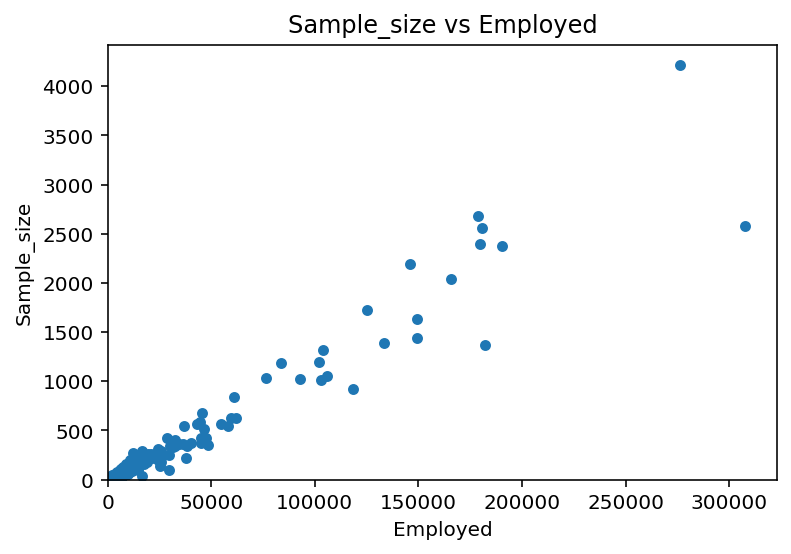

In [11]:
ax = recent_grads.plot (x='Employed', y='Sample_size', kind='scatter')
ax.set_title("Sample_size vs Employed")
ax.set_xlim(0)
ax.set_ylim(0)

In this arrangement, we can easily see that Sample_size frequently is smaller than it would be with a perfect linear relationsip. Sometimes it is much smaller. 

Investigating this discrepency may not change the answers we eventually find to the questions posed above, but it will almost certainly help us better understand this dataset. This practice of working to understand the unexpected is essential to exploratory data analysis.

I notice that while those whose salaries were sampled to determine the median salary for each major should be drawn from the employed, the `Sample_size` metric is actually a subset of those working full time for at least fifty weeks out of the year.

Based on this I believe it may be be more closely related to `Full_time_year_round`. Is it?  Let's find out.

(0.0, 4422.5)

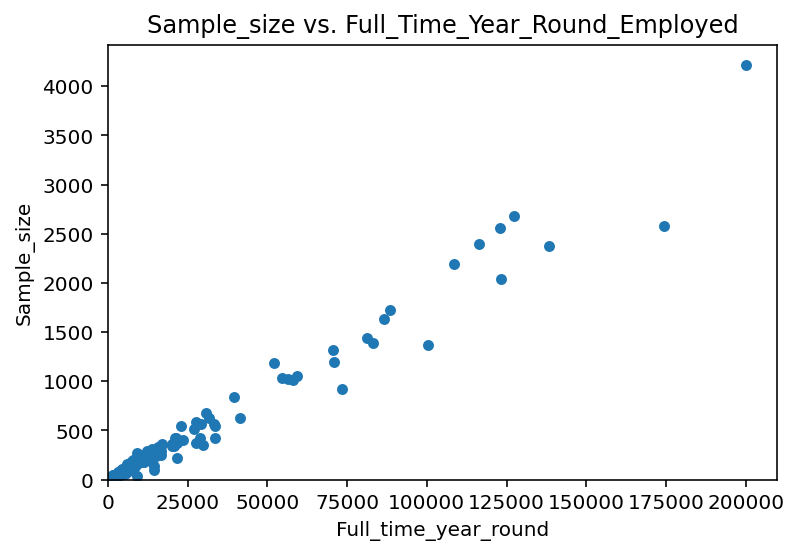

In [12]:
ax = recent_grads.plot(x='Full_time_year_round', y='Sample_size', kind='scatter')
ax.set_title("Sample_size vs. Full_Time_Year_Round_Employed")
ax.set_xlim(0)
ax.set_ylim(0)

This relationship appears somewhat tighter than the relationship between Sample Size and Employment. In some cases, it still diverges but not by such a large degree.

There still seems to be some unaccounted factor contributing to `Sample_size`.

For perspective, I'm going to see how it relates to the total number of people with each major. 

(0.0, 4422.5)

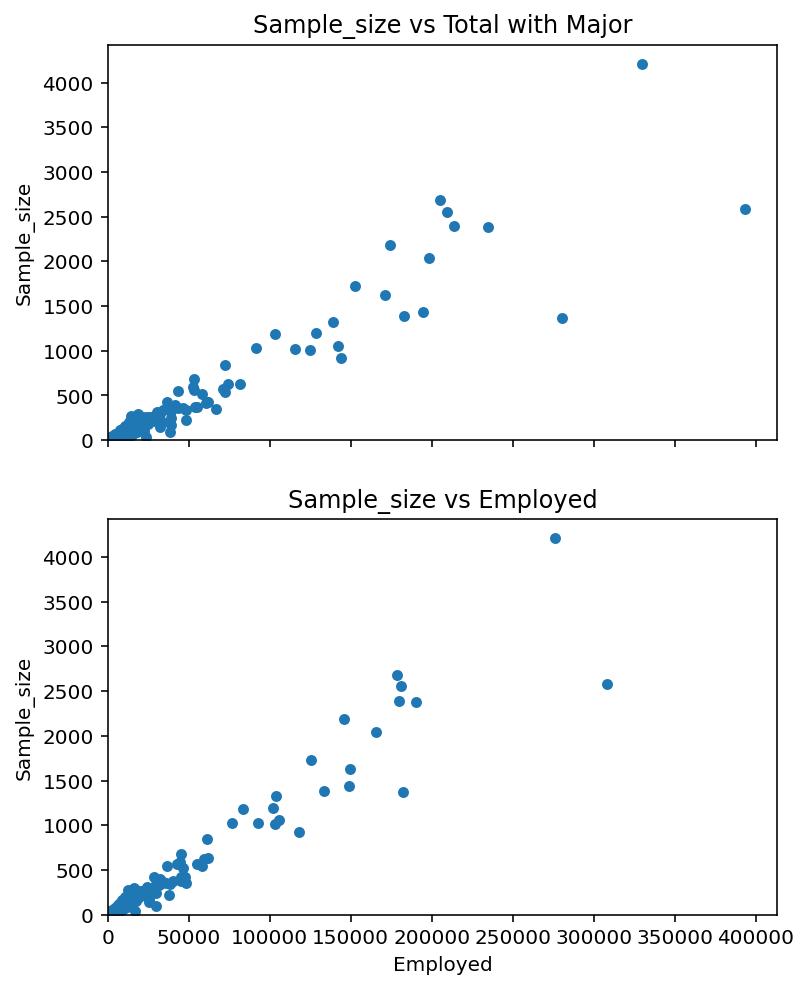

In [13]:
fig, [ax1, ax2] = plt.subplots(2,1, figsize=(6,8), sharex=True, sharey=True)
ax1 = recent_grads.plot(x='Total', y='Sample_size', kind='scatter', ax=ax1)
ax1.set_title("Sample_size vs Total with Major")
ax2.set_xlim(0)
ax1.set_ylim(0)

ax2 = recent_grads.plot (x='Employed', y='Sample_size', kind='scatter', ax=ax2)
ax2.set_title("Sample_size vs Employed")
ax2.set_xlim(0)
ax2.set_ylim(0)

I've gone ahead and paired this new plot with the plot for Sample_size vs Employed employed before because, while they differ, they have a similar range of deviation.

This investigation has demonstrated that there are nuances in this dataset, and that it will take more investigation to understand them.

### Testing Basic Assumptions

At this juncture it makes sense to outline some assumptions about the dataset.

To the best of my understanding:
 * This dataset is derived from the American Community Survey PUMS dataset.
 * The parent dataset is composed of information about individuals and households.
 * The dataset we are working with has been tabulated from a subset of the parent dataset where a college major is specified and the individual was under the age of 28 when the data was collected.
 
I expect that:
 * `Men` + `Women` == `Total`
 * `Employed` + `Unemployed` == `Total`
 * `Full_time` + `Part_time` == `Employed`
 * `Full_time_year_round` <= `Full_time`
 * `Sample_size` <= `Full_time_year_round`

In [14]:
print("Total:", recent_grads['Total'].sum())
print("Men + Women:", 
      recent_grads['Men'].sum()+recent_grads['Women'].sum())
print("Employed + Unemployed:", 
      recent_grads['Employed'].sum()+recent_grads['Unemployed'].sum())
print("Employed", recent_grads['Employed'].sum())
print("Full_time + Part_time:", 
      recent_grads['Full_time'].sum()+recent_grads['Part_time'].sum())
print("Full_time:", recent_grads['Full_time'].sum())
print("Full_time_year_round:", recent_grads['Full_time_year_round'].sum())
print("Sample_size:", recent_grads['Sample_size'].sum())

Total: 6771654.0
Men + Women: 6771654.0
Employed + Unemployed: 5810886
Employed 5393199
Full_time + Part_time: 6027396
Full_time: 4500512
Full_time_year_round: 3405401
Sample_size: 61566


Thie above investigation shows that my understanding is imperfect. ~900,000 people are neither employed nor unemployed.
~700,000 people have full or part time work, but are not considered employed.
~200,000 people have full or part time work, and are considered neither employed nor unemployed.

I believe some of my confusion is probably down to the formal definition of unemployed, which probably means people who aren't working and are seeking work. Those who aren't working and not seeking work are not considered unemployed. It may also be the case that those whose hours were involuntarily reduced and are seeking more hours are considered unemployed. I am not sure about those who are considered to have full or part time work, but are neither considered employed or unemployed.

Let's explore some other relationships.

### Do students in more popular majors make more money?

(0.0, 114400.0)

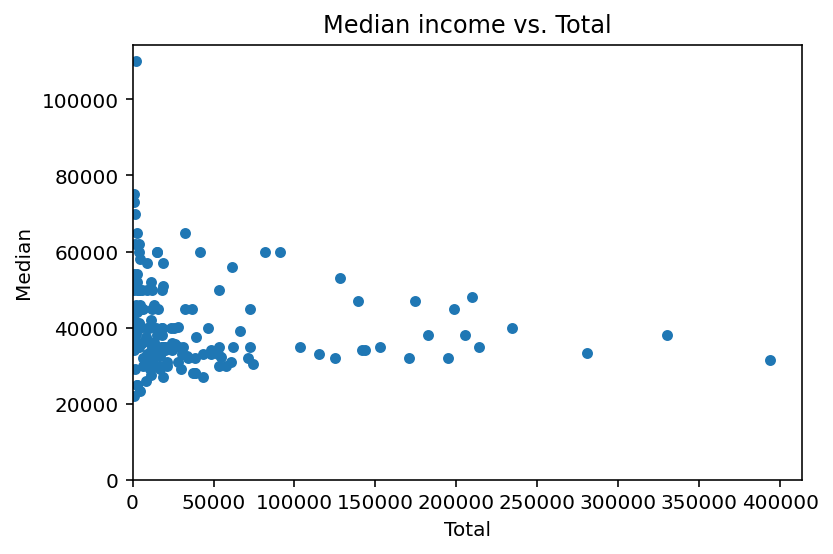

In [15]:
ax = recent_grads.plot(x='Total', y='Median', kind='scatter')
ax.set_title('Median income vs. Total')
ax.set_xlim(0)
ax.set_ylim(0)

The realationship between the popularity of a major and the median income of recent graduates in that major is visualized above.

We can see that median incomes range from \~\\$20K to as much as \~\\$105K. The least popular majors span that full range of incomes. However, the highest earning majors are all at the low end of the poularity range. and the most popular majors have median salaries of \~\\$35K. It appears though that for most majors, popularity does not have a strong relationship to median income.

### Do students that majored in subjects that were majority female make more money?

(0.0, 114400.0)

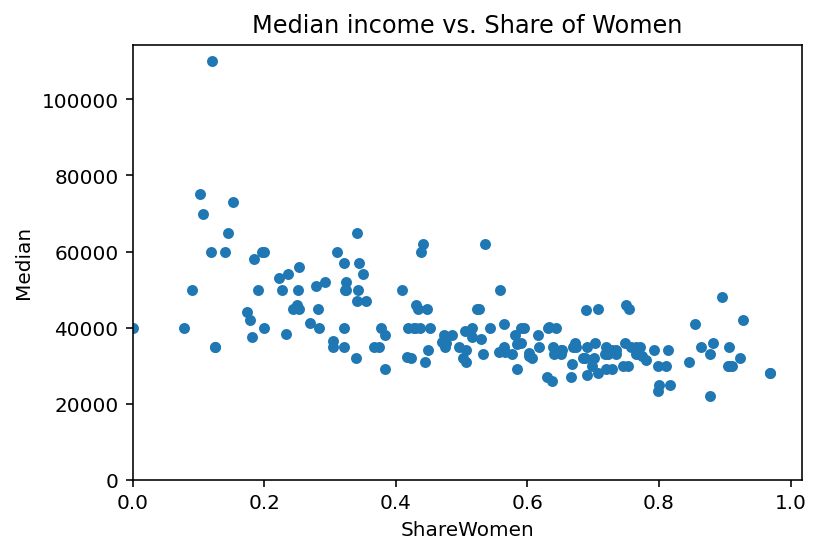

In [16]:
ax = recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')
ax.set_title('Median income vs. Share of Women' )
ax.set_xlim(0)
ax.set_ylim(0)

By comparing the median income for majors to to the portion of female graduates with that major, we see that median salaries tend to decline as the portion of female graduates increases. Further, the four highest earning majors are dominated with male graduates, while the lowest earning majors are majority female.

### Do students that majored in subjects that were majority female have higher employment rates?

(0.0, 0.18608772735)

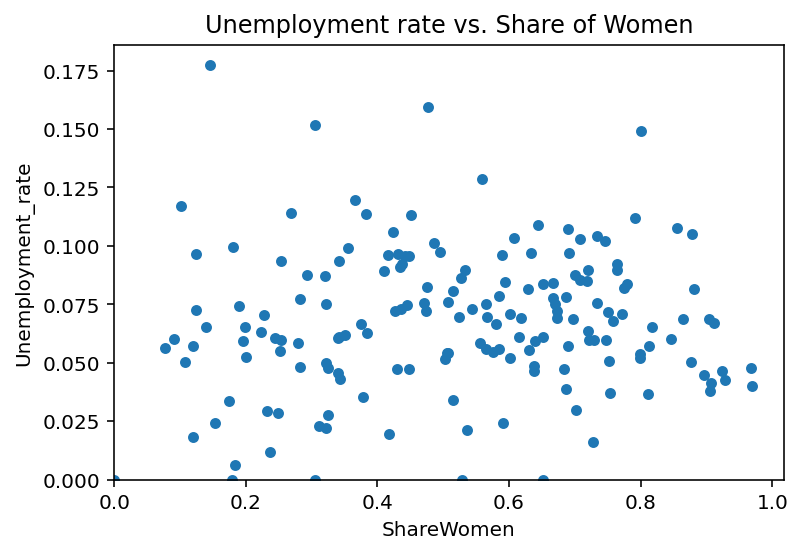

In [17]:
ax = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax.set_title('Unemployment rate vs. Share of Women' )
ax.set_xlim(0)
ax.set_ylim(0)

Unemployment rates range from near 0% to ~17%.

If we look at the relationship between the share of women graduates in a major and the unemployment rate for people with that major, there isn't an obvious relationship.

Interestingly, the the highest and lowest unemployment rates are for majors that are predominantly male.

###  Is there any link between the number of full-time employees and median salary?

(0.0, 114400.0)

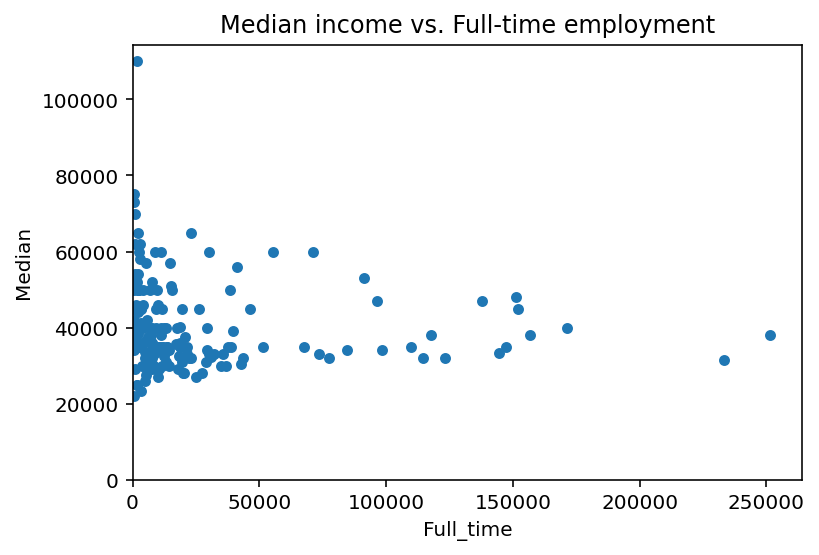

In [18]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Median income vs. Full-time employment')
ax.set_xlim(0)
ax.set_ylim(0)

The ralationship between Median income and Full-time employment is very similar to that of Median income to total graduates in a major.

The majors with the fewest graduates employed full-time range from the lowest to the highest median incomes. The majors with the most graduates employed full-time have relatively low median incomes. For the majority of majors there doesn't seem to be a clear relationship between the number of graduates and median salary for graduates with each major.

We can also see a similar pattern when comparing Median income to the number of male and female graduates in each major (below).

(0.0, 114400.0)

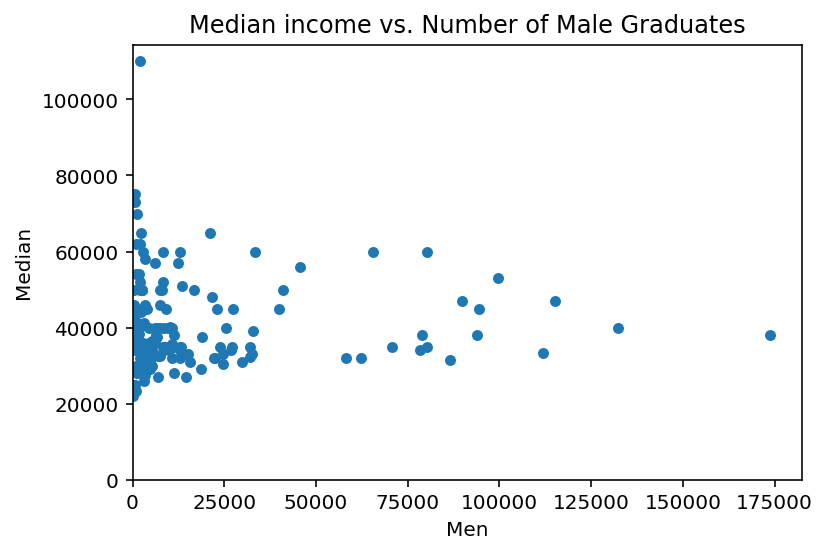

In [19]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax.set_title('Median income vs. Number of Male Graduates')
ax.set_xlim(0)
ax.set_ylim(0)

(0.0, 114400.0)

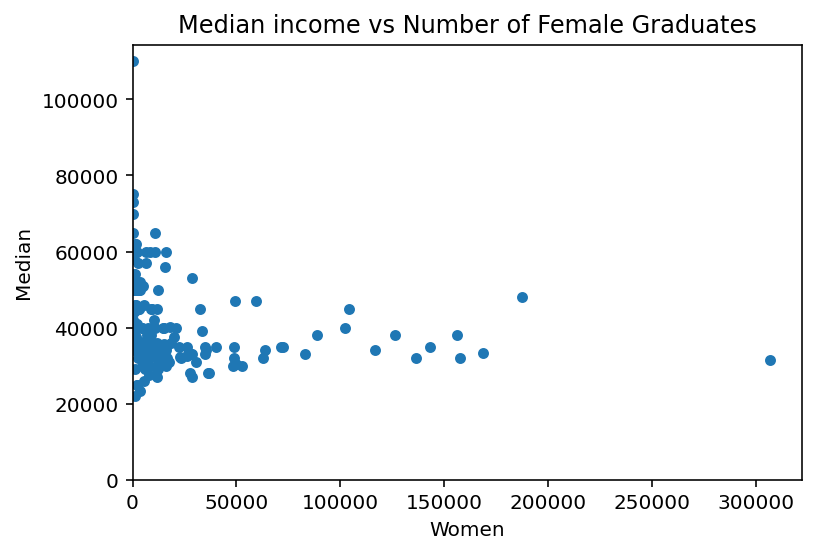

In [20]:
ax = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax.set_title('Median income vs Number of Female Graduates')
ax.set_xlim(0)
ax.set_ylim(0)

## Visualizationw with Histograms

### Sample_size

<AxesSubplot:>

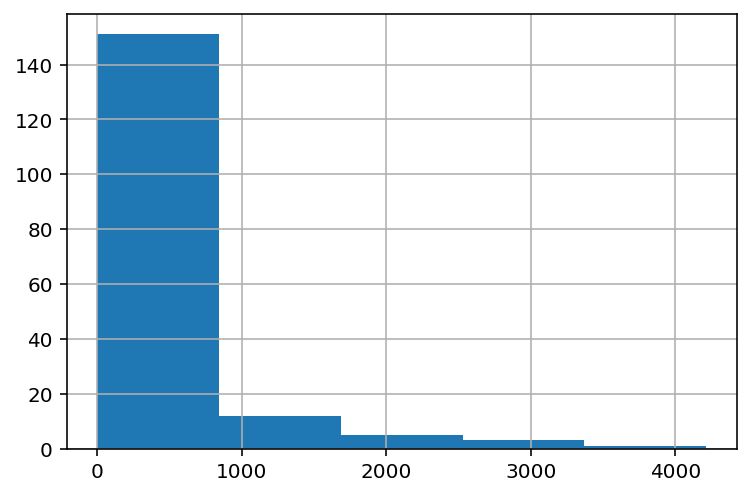

In [21]:
recent_grads['Sample_size'].hist(bins=5)

We can see that `Sample_size` ranges from \~400 to 4000, and that the vast majority (~150 majors) are around 400.

### Overall Employment

<AxesSubplot:>

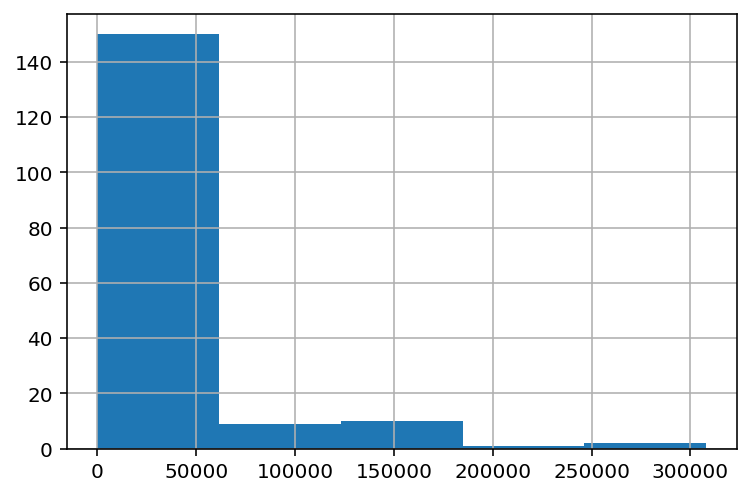

In [22]:
recent_grads['Employed'].hist(bins=5)

The number of people employed in each major ranges from \~30K to \~275K. The vast majority (~150 majors) are at the low end of the range and have ~30K people employed.

### Full-time employment

<AxesSubplot:>

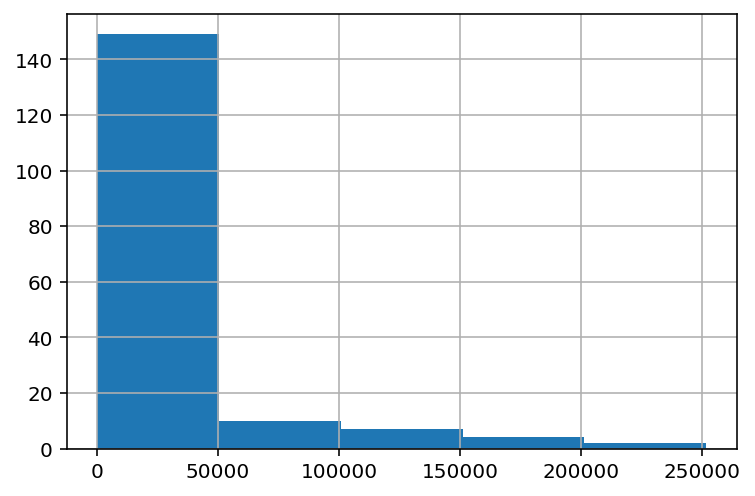

In [23]:
recent_grads['Full_time'].hist(bins=5)

The number of people in each major with full-time employment ranges from \~25K to 250K. The majority of majors (\~150) have about \~25K employed. 

### Unemployment Rates

<AxesSubplot:>

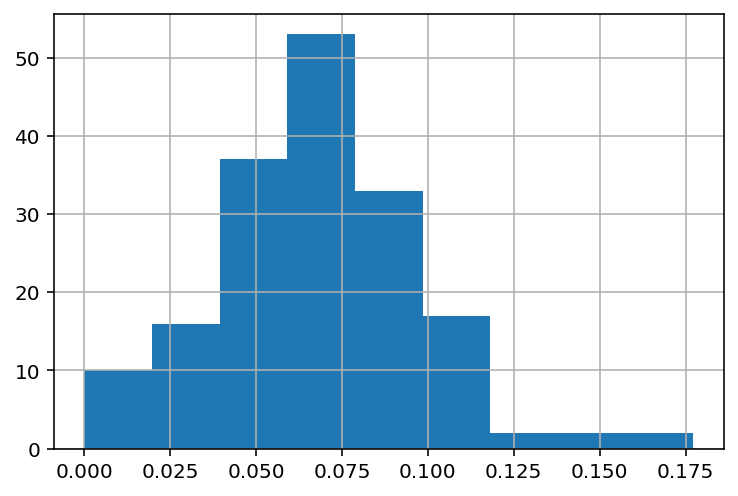

In [24]:
recent_grads['Unemployment_rate'].hist(bins=9)

Unemployment rates for each major range from \~1% to 18%. The largest number of majors (\~53) have an unemployment rate of about \~7%. The majority (~125) are in the range of 4-10%.

### Gender Ratios

<AxesSubplot:>

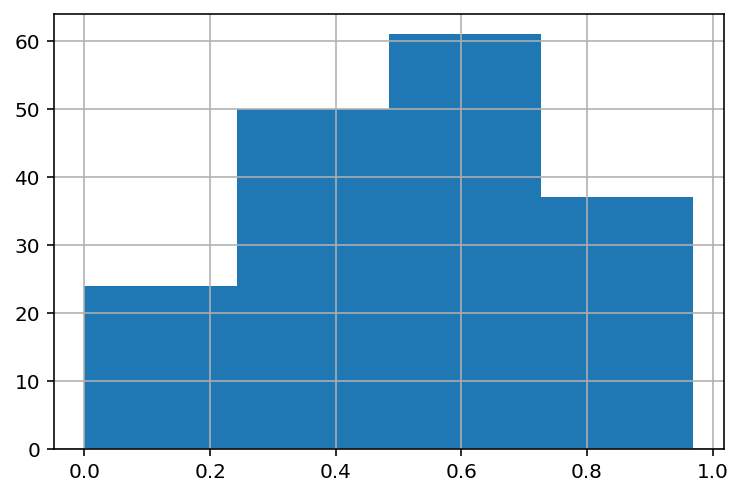

In [25]:
recent_grads['ShareWomen'].hist(bins=4)

If we define "predominantly" as 75% or more, then \~14% (24/172) of majors are predominantly male and \~32% (37/172) are predominantly female. 

There are more majors with a majority of women than there are with a majority of men. This reflects the fact that substantially more women graduate from college than men.

In [26]:
print("Recent Grads:")
print("Women:", recent_grads['Women'].sum())
print("Men:", recent_grads['Men'].sum())

Recent Grads:
Women: 3895228.0
Men: 2876426.0


### Median salary range

<AxesSubplot:>

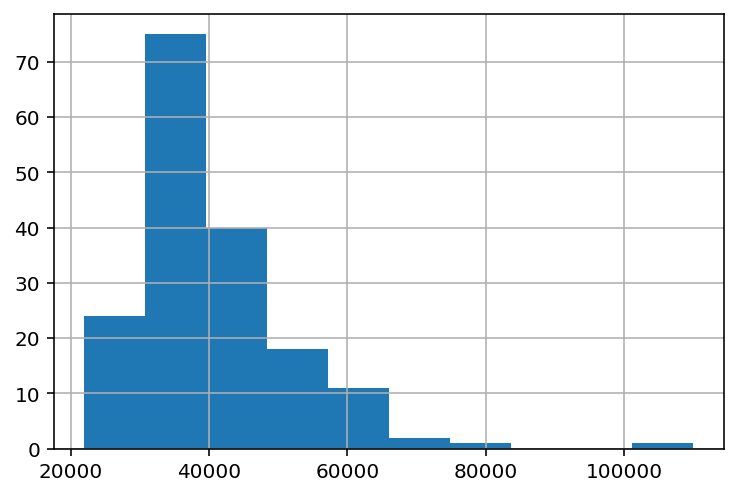

In [27]:
recent_grads['Median'].hist(bins=10)

The most common median salary range is $30-40K.

Median incomes for recent graduates with full-time, year-round employment range from \~\\$24K to \\$110K. The largest number of majors (\~75) are in the \\$30-40K range, and the vast majority (\~140) are in the \\$20-50K range. 

## Scatter Matrix Plot

Pandas provides a Scatter Matrix plot that automatically combines scatter plots and histograms in one plot. It can be useful for better understanding the relationships between two or more variables.

Here I will apply it to some of the questions investigated earlier.

In [28]:
from pandas.plotting import scatter_matrix 

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>]], dtype=object)

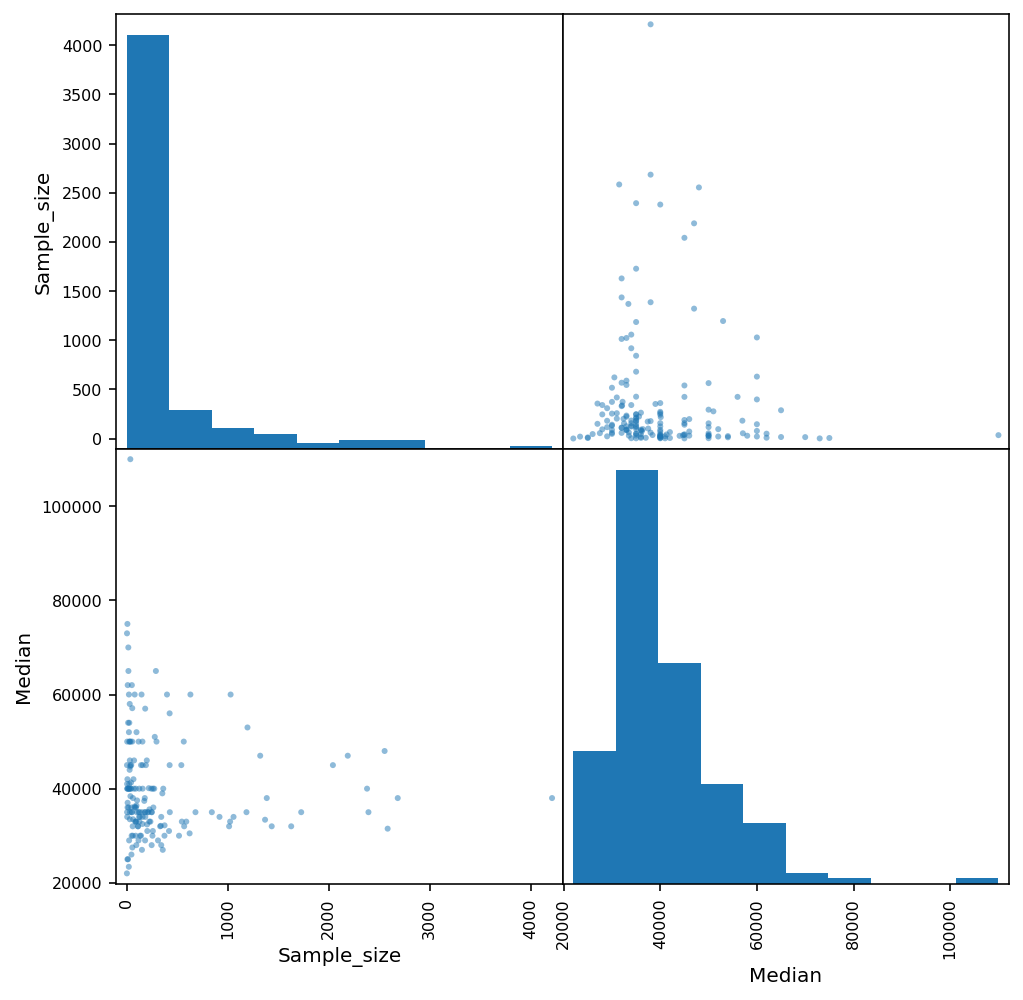

In [29]:
scatter_matrix(recent_grads[['Sample_size','Median']], figsize=(8,8))

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Median'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Unemployment_rate'>]],
      dtype=object)

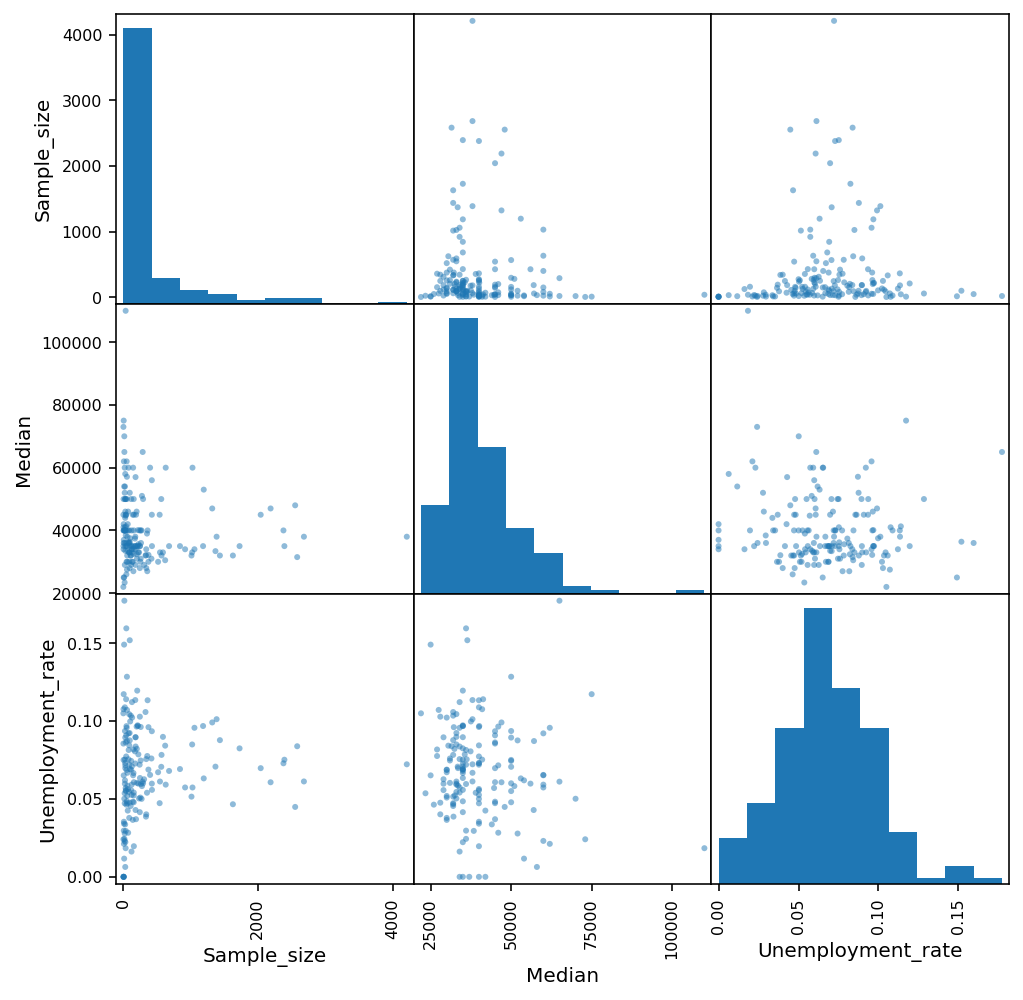

In [30]:
scatter_matrix(recent_grads[['Sample_size','Median', 'Unemployment_rate']], figsize=(8,8))

array([[<AxesSubplot:xlabel='ShareWomen', ylabel='ShareWomen'>,
        <AxesSubplot:xlabel='Median', ylabel='ShareWomen'>],
       [<AxesSubplot:xlabel='ShareWomen', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>]], dtype=object)

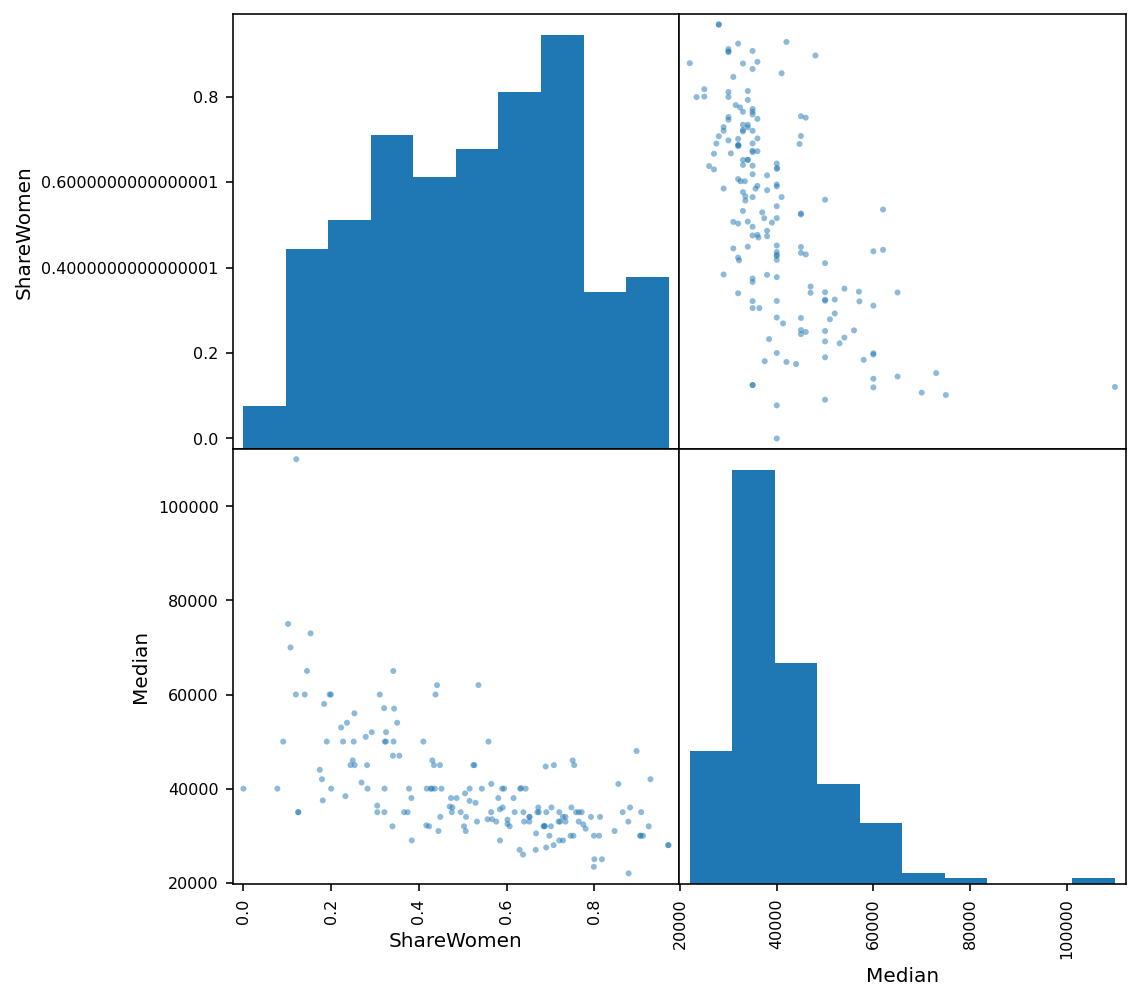

In [31]:
scatter_matrix(recent_grads[['ShareWomen','Median']], figsize=(8,8))

array([[<AxesSubplot:xlabel='Full_time', ylabel='Full_time'>,
        <AxesSubplot:xlabel='Median', ylabel='Full_time'>],
       [<AxesSubplot:xlabel='Full_time', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>]], dtype=object)

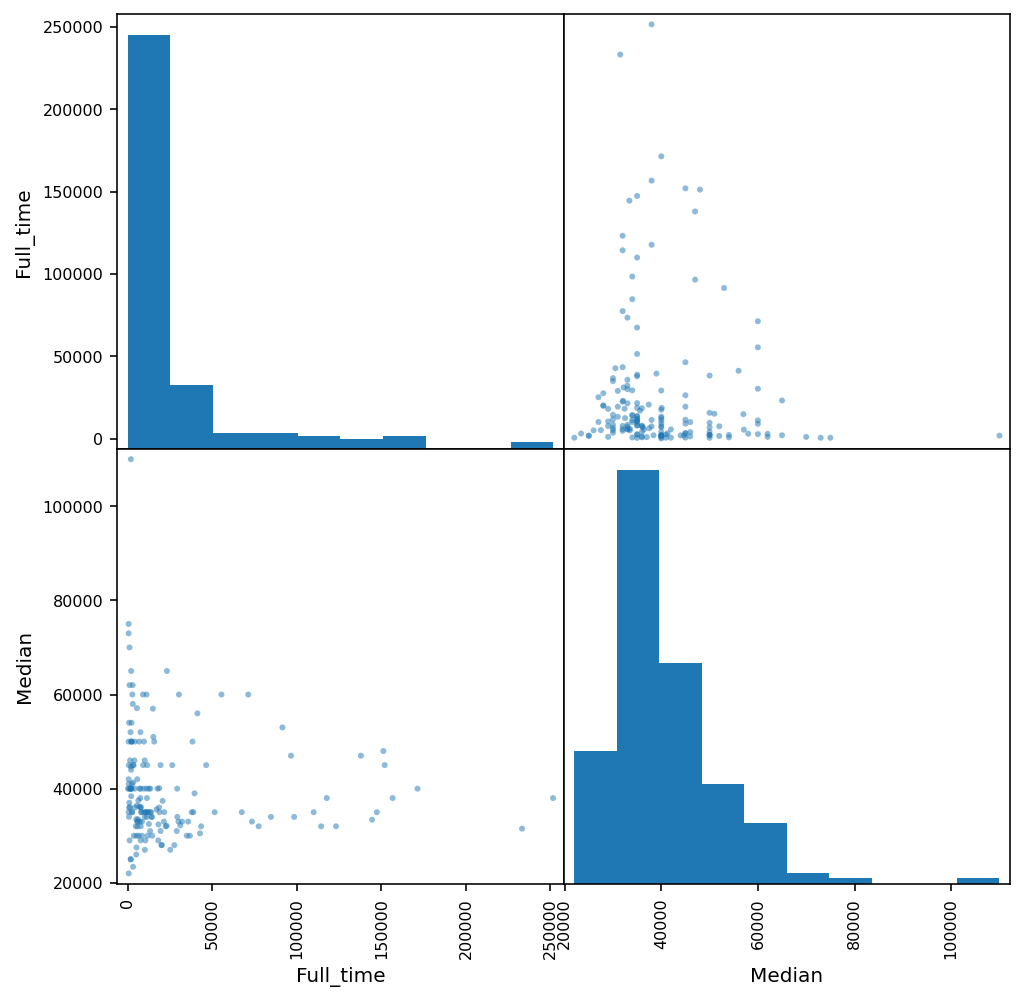

In [32]:
scatter_matrix(recent_grads[['Full_time','Median']], figsize=(8,8))

array([[<AxesSubplot:xlabel='Total', ylabel='Total'>,
        <AxesSubplot:xlabel='Median', ylabel='Total'>],
       [<AxesSubplot:xlabel='Total', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>]], dtype=object)

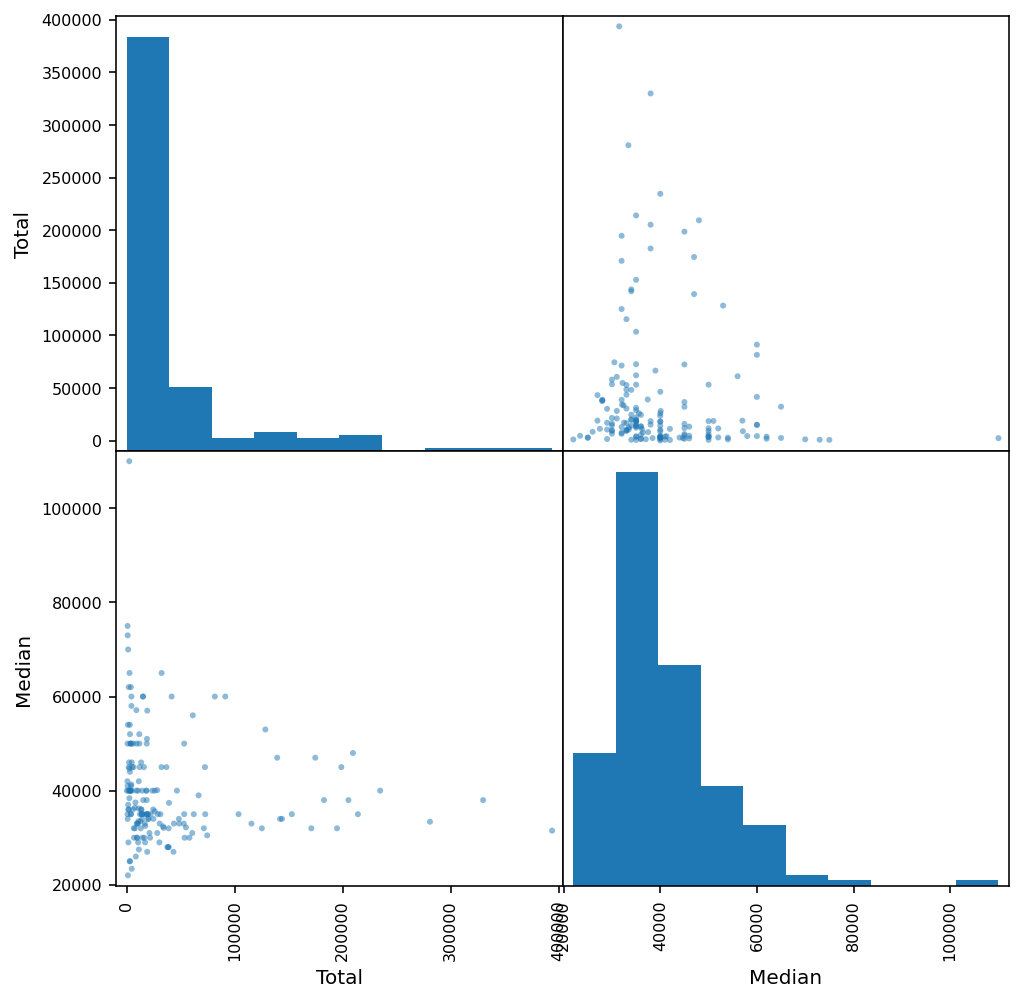

In [33]:
scatter_matrix(recent_grads[['Total','Median']], figsize=(8,8))

Scatter Matrix plots can help clarify data interpretation by showing the distribution of values for variables along side the relationship of values between variables.

## Bar Plots

### Share of Women in Top and Bottom Ranked Majors

<AxesSubplot:title={'center':'Bottom Ranked'}, ylabel='Major'>

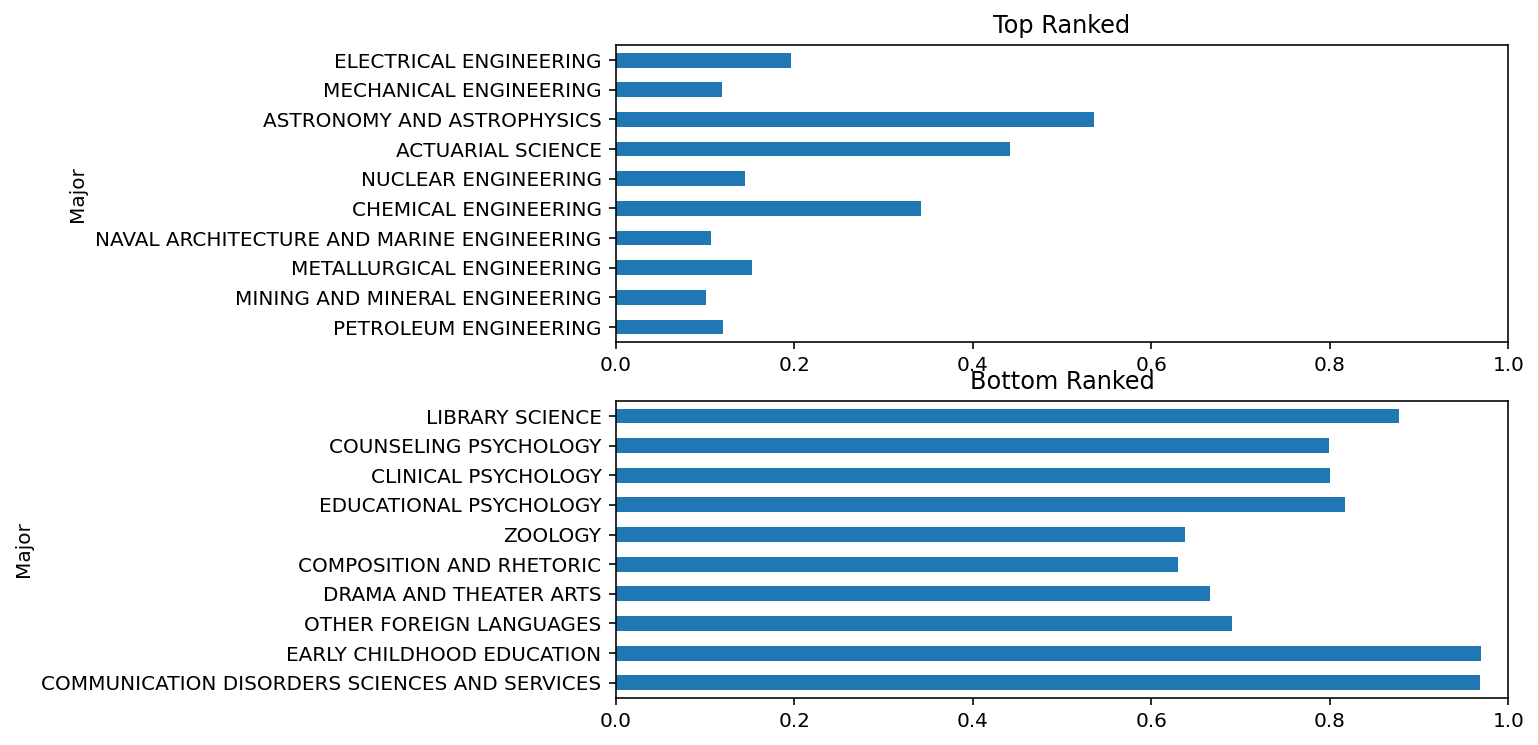

In [34]:
top = recent_grads[:10]
bottom = recent_grads[-10:]

fig, [ax1, ax2] = plt.subplots(2,1, figsize=(8,6))
top.plot.barh(x='Major', y='ShareWomen', 
                            title="Top Ranked",
                            legend=False,
                            xlim=(0,1),
                            ax=ax1)
bottom.plot.barh(x='Major', y='ShareWomen', 
                             title="Bottom Ranked", 
                             legend=False,
                             xlim=(0,1), 
                             ax=ax2)


From the above graphs we can see that:
* Of the highest ranked (by new graduate earnings) majors, the graduates of seven are more than 3/4 male, and none of the remaining three are more than ~1/2 female. 
* Among the lowest ranked majors, all have a majority of female graduates. Two have nearly 100% female graduates, and none and none have fewer than 60% female graudates.

### Unemployment Rates for Top and Bottom Ranked Majors

<AxesSubplot:ylabel='Major'>

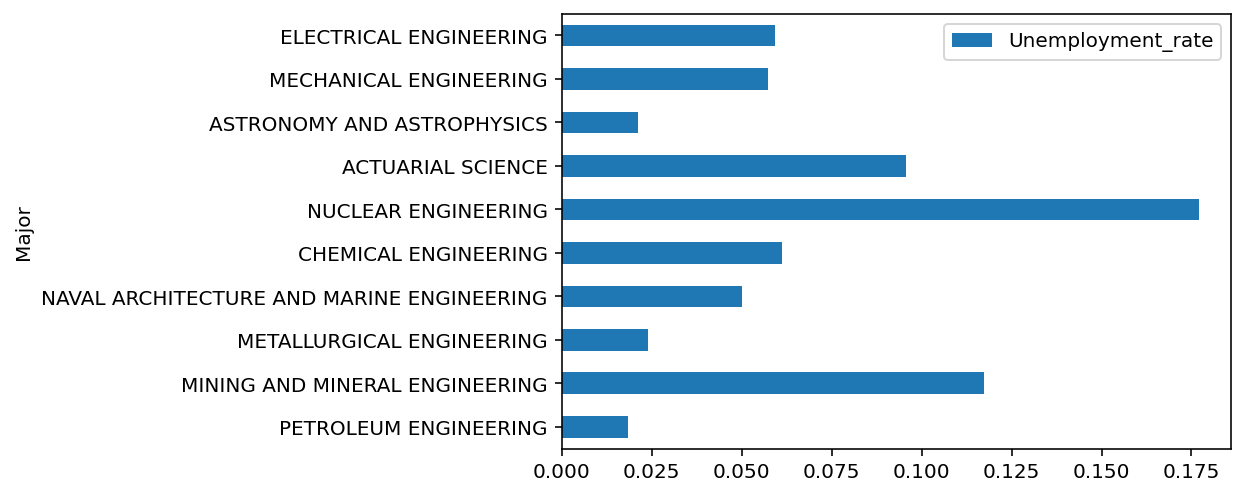

In [35]:
top.plot.barh(x='Major', y='Unemployment_rate', ylim=(0,0.2))

<AxesSubplot:ylabel='Major'>

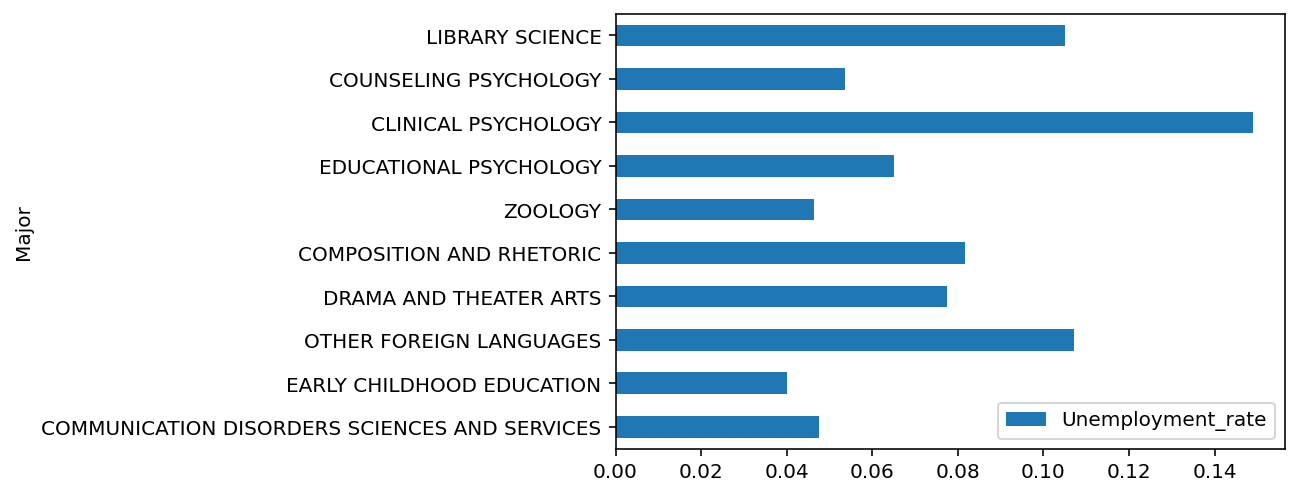

In [36]:
bottom.plot.barh(x='Major', y='Unemployment_rate', ylim=(0,0.2))

In [37]:
print("Unemployment rate:")
print("Overall:", recent_grads["Unemployment_rate"].mean())
print("Top ranked:", top["Unemployment_rate"].mean())
print("Bottom ranked:", bottom["Unemployment_rate"].mean())

Unemployment rate:
Overall: 0.06802373423255813
Top ranked: 0.06815034360000001
Bottom ranked: 0.0773135073


The mean unemployment rate for the top ranked majors are close to the overall mean for all majors, though there is a wide range.

The mean unemployment rates for the bottom ranked majors is a full point higher than the overall mean for all majors, though there is a wide range of values.

### Graduates by Major Category

<AxesSubplot:ylabel='Major_category'>

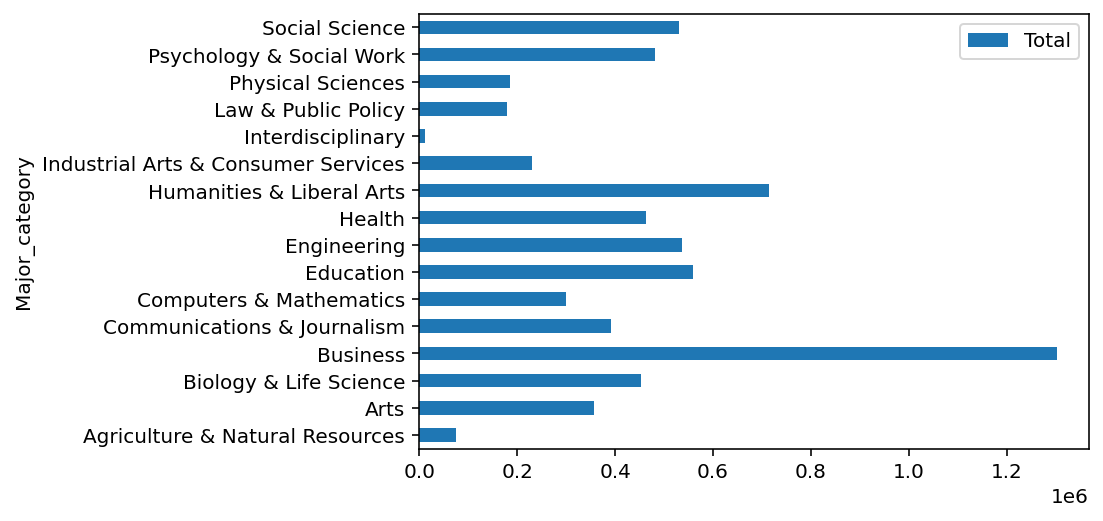

In [38]:
recent_grads.groupby('Major_category')[['Total']].sum().plot.barh()

### Gender Balance by Major Category

<AxesSubplot:xlabel='Major_category'>

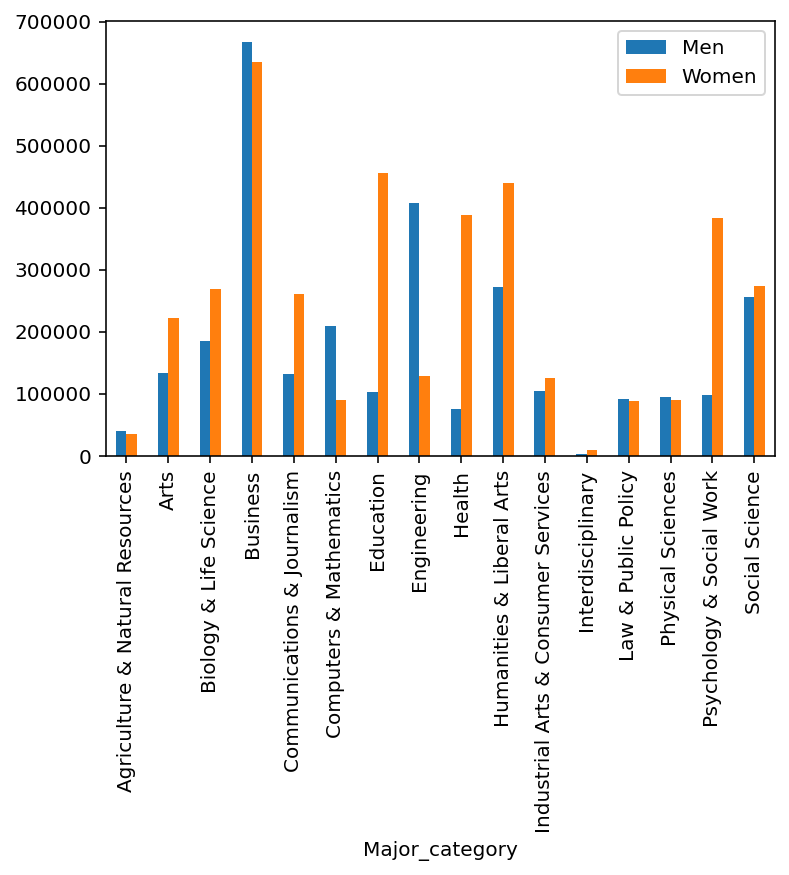

In [39]:
recent_grads.groupby('Major_category')[['Men', 'Women']].sum().plot.bar()

### Overall Gender Balance

<AxesSubplot:>

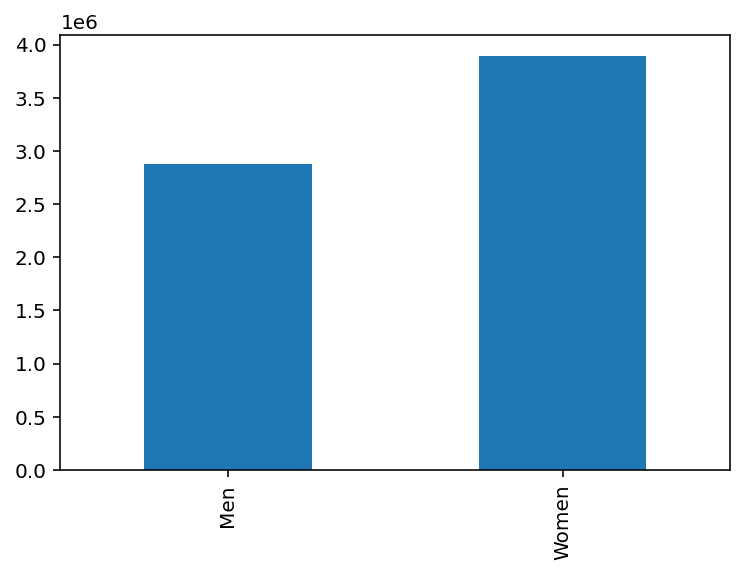

In [40]:
recent_grads[['Men', 'Women']].sum().plot.bar()

### Distributions of median salaries and unemployment rate.

<AxesSubplot:>

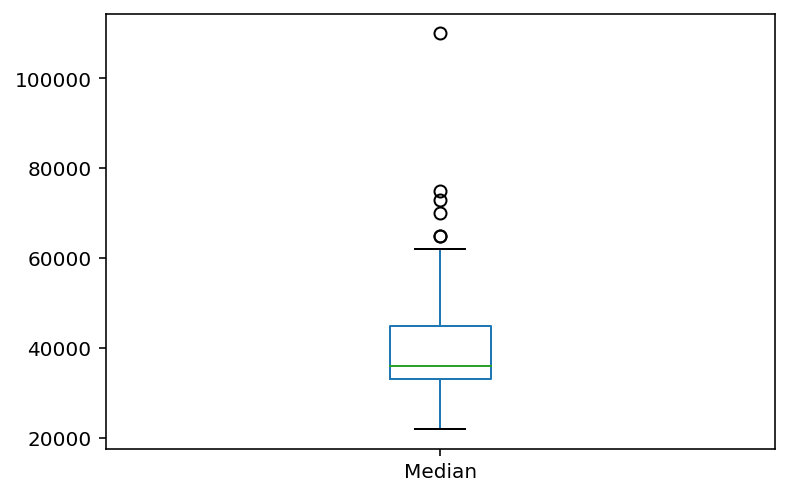

In [41]:
recent_grads['Median'].plot.box()

<AxesSubplot:>

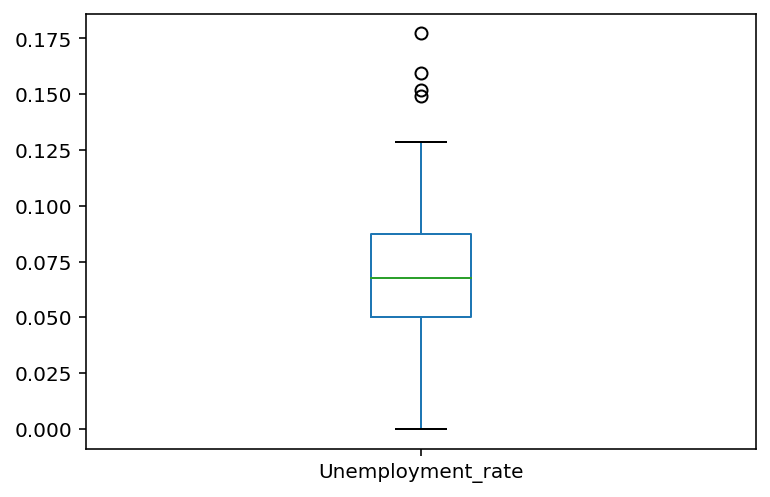

In [42]:
recent_grads['Unemployment_rate'].plot.box()

We see that there are outliers at the top of both median income and unemployment rates.

## Hexbin plots as an alternative to scatter plots.

In [ ]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,5)) 
recent_grads.plot.hexbin(x='Full_time', 
                              y='Median', 
                              gridsize=10,
                              ax=ax1
                        )
ax1.set_title('Median income vs. Full-time employment')
ax1.set_xlim(0)
ax1.set_ylim(0)

recent_grads.plot.scatter(x='Full_time', 
                              y='Median', 
                              ax=ax2
                        )
ax2.set_title('Median income vs. Full-time employment')
ax2.set_xlim(0)
ax2.set_ylim(0)

In [ ]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,5)) 
recent_grads.plot.hexbin(x='ShareWomen', 
                               y='Unemployment_rate', 
                               gridsize=10,
                               ax=ax1
                              )
ax1.set_title('Unemployment rate vs. Share of Women' )
ax1.set_xlim(0)
ax1.set_ylim(0)

recent_grads.plot.scatter(x='ShareWomen', 
                               y='Unemployment_rate', 
                               ax=ax2)
ax2.set_title('Unemployment rate vs. Share of Women' )
ax2.set_xlim(0)
ax2.set_ylim(0)

In [ ]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,5)) 
recent_grads.plot.hexbin(x='ShareWomen', 
                               y='Median', 
                               gridsize=10,
                               ax=ax1
                              )
ax1.set_title('Median income vs. Share of Women' )
ax1.set_xlim(0)
ax1.set_ylim(0)

recent_grads.plot.scatter(x='ShareWomen', 
                               y='Median', 
                               ax=ax2
                              )
ax2.set_title('Median income vs. Share of Women' )
ax2.set_xlim(0)
ax2.set_ylim(0)

Above I've displayed hexbin plots next to their scatter-plot equivalents. The hexbin plots help make distributions more clear by quantifying the density of points over regions.

# Conclusion

The American Community Survey is a rich dataset. This exploration has only scratched the surface, even so, it shows that:

* The highest earning majors are among the least popular.
* The most popular majors have earnings at or below the mean for all majors.
* ~14% of majors are predominantly (>75%) male, while ~22% are predominantly female.
* Of the ten top-ranked majors:
  * Seven are predominantly male.
  * None of the remaining three are more than 50% female.
* Of the ten bottom-ranked majors:
  * All have a majority of female graduates. 
  * Two have nearly 100% female graduates.
  * None and none have fewer than 60% female graudates.
* *Business* and *Humanities & Liberal Arts* are the most popular categories of majors.